# Creating UML diagrams with PlantUML

PlantUML is a tool to create UML-diagrams using plain text.
See: https://plantuml.com/

In this notebook we use python libraries to create PlantUML diagrams. 

PlantUML provides a 'diagram as code' solution. This means that with text/code as input, an UML-diagram can be created. 
So, of an UML can have two representations:
- the code (or txt.file)
- the diagram



### Contents:
- O. Install libraries
- 1. Py2PUML
- 2. IPlantUML
- 3. Converting a XML file to a UML Class diagram
- 4. Turning a JSON object into a diagram

N.B. Another popular library for python is 'plantuml', however this one does not work under IPython / Jupyter

## 0. Install libraries

In [16]:
#pylint is a dependency
!pip install pylint

In [6]:
!pip install plantuml

In [10]:
!pip install iplantuml

## 2. IPlantUML

- Pypi.org: https://pypi.org/project/IPlantUML/
- GitHub: https://github.com/jbn/iplantuml
- more info: https://pythonhosted.org/plantuml/

Please be aware that with cells with %%plantuml you cannot use comments with #

In [2]:
import iplantuml

In [17]:
!mkdir UML

A subdirectory or file UML already exists.


In [18]:
cd UML

C:\Users\31653\Documents\GitHub\Notebooks\UML


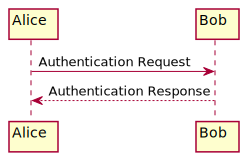

In [5]:
%%plantuml -n 'dummy'

@startuml
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response
@enduml

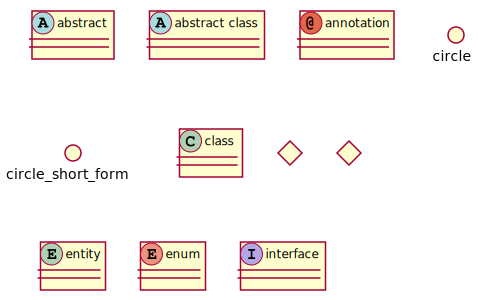

In [4]:
%%plantuml 
@startuml
abstract        abstract
abstract class  "abstract class"
annotation      annotation
circle          circle
()              circle_short_form
class           class
diamond         diamond
<>              diamond_short_form
entity          entity
enum            enum
interface       interface
@enduml

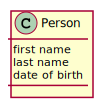

In [29]:
%%plantuml
@startuml
class Person{ 
first name
last name
date of birth
}
@enduml

## 3. Converting a xml file to a PlantUML class diagram

In [3]:
import iplantuml
import glob
my_xmls=glob.glob('*.xml')
my_xmls

['haarcascade_frontalface_default.xml',
 'haar_cascade_stop.xml',
 'movies.xml',
 'simple.xml']

In [8]:
import xml.etree.ElementTree as ET #import the library 
tree = ET.parse('movies.xml') #parse the XML
ET.dump(tree) #print the xml file

<collection>
    <genre category="Action">
        <decade years="1980s">
            <movie favorite="True" title="Indiana Jones: The raiders of the lost Ark">
                <format multiple="No">DVD</format>
                <year>1981</year>
                <rating>PG</rating>
                <description>
                'Archaeologist and adventurer Indiana Jones 
                is hired by the U.S. government to find the Ark of the 
                Covenant before the Nazis.'
                </description>
            </movie>
               <movie favorite="True" title="THE KARATE KID">
               <format multiple="Yes">DVD,Online</format>
               <year>1984</year>
               <rating>PG</rating>
               <description>None provided.</description>
            </movie>
            <movie favorite="False" title="Back 2 the Future">
               <format multiple="False">Blu-ray</format>
               <year>1985</year>
               <rating>PG</rating>
     

In [9]:
my_list =[]
for elem in tree.iter():
    my_list.append(elem.tag)
#remove duplicates by converting it to a dict and back to a list
#source: https://www.w3schools.com/python/python_howto_remove_duplicates.asp
my_clean_list = list(dict.fromkeys(my_list))
#print(my_clean_list)
for i in range (len(my_clean_list)):
        print(my_clean_list[i])

collection
genre
decade
movie
format
year
rating
description


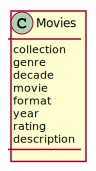

In [4]:
%%plantuml
@startuml
class Movies{
collection
genre
decade
movie
format
year
rating
description
}
@enduml

In [10]:
#create the plantuml text file
class_name = 'movie' #enter class name
textfile = open("plantuml.txt", "w")
textfile.write('@startuml\n')
textfile.write('class '+class_name + '{\n')
for element in my_clean_list:
    textfile.write(element + "\n")
textfile.write('}\n')
textfile.write('@enduml')
textfile.close()                   

In [13]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\plantuml.txt

In [11]:
#convert the txt file to an .png image using plantuml
!python -m plantuml plantuml.txt

[{'filename': 'plantuml.txt', 'gen_success': True}]


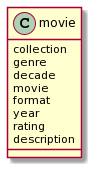

In [12]:
#show the generated png
from IPython import display
display.Image(filename="plantuml.png", width=100, height=100)

## 4. Turning a JSON object into a diagram

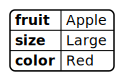

In [22]:
%%plantuml
@startjson
{
   "fruit":"Apple",
   "size":"Large",
   "color":"Red"
}
@endjson

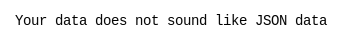

In [8]:
%%plantuml
@startjson
{'schemas': {'Order': {'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
    'petId': {'type': 'integer', 'format': 'int64', 'example': 198772},
    'quantity': {'type': 'integer', 'format': 'int32', 'example': 7},
    'shipDate': {'type': 'string', 'format': 'date-time'},
    'status': {'type': 'string',
     'description': 'Order Status',
     'example': 'approved',
     'enum': ['placed', 'approved', 'delivered']},
    'complete': {'type': 'boolean'}},
   'xml': {'name': 'order'}},
  'Customer': {'type': 'object',
   'properties': {'id': {'type': 'integer',
     'format': 'int64',
     'example': 100000},
    'username': {'type': 'string', 'example': 'fehguy'},
    'address': {'type': 'array',
     'xml': {'name': 'addresses', 'wrapped': True},
     'items': {'$ref': '#/components/schemas/Address'}}},
   'xml': {'name': 'customer'}},
  'Address': {'type': 'object',
   'properties': {'street': {'type': 'string', 'example': '437 Lytton'},
    'city': {'type': 'string', 'example': 'Palo Alto'},
    'state': {'type': 'string', 'example': 'CA'},
    'zip': {'type': 'string', 'example': '94301'}},
   'xml': {'name': 'address'}},
  'Category': {'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 1},
    'name': {'type': 'string', 'example': 'Dogs'}},
   'xml': {'name': 'category'}},
  'User': {'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
    'username': {'type': 'string', 'example': 'theUser'},
    'firstName': {'type': 'string', 'example': 'John'},
    'lastName': {'type': 'string', 'example': 'James'},
    'email': {'type': 'string', 'example': 'john@email.com'},
    'password': {'type': 'string', 'example': '12345'},
    'phone': {'type': 'string', 'example': '12345'},
    'userStatus': {'type': 'integer',
     'description': 'User Status',
     'format': 'int32',
     'example': 1}},
   'xml': {'name': 'user'}},
  'Tag': {'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64'},
    'name': {'type': 'string'}},
   'xml': {'name': 'tag'}},
  'Pet': {'required': ['name', 'photoUrls'],
   'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
    'name': {'type': 'string', 'example': 'doggie'},
    'category': {'$ref': '#/components/schemas/Category'},
    'photoUrls': {'type': 'array',
     'xml': {'wrapped': True},
     'items': {'type': 'string', 'xml': {'name': 'photoUrl'}}},
    'tags': {'type': 'array',
     'xml': {'wrapped': True},
     'items': {'$ref': '#/components/schemas/Tag'}},
    'status': {'type': 'string',
     'description': 'pet status in the store',
     'enum': ['available', 'pending', 'sold']}},
   'xml': {'name': 'pet'}},
  'ApiResponse': {'type': 'object',
   'properties': {'code': {'type': 'integer', 'format': 'int32'},
    'type': {'type': 'string'},
    'message': {'type': 'string'}},
   'xml': {'name': '##default'}}},
 'requestBodies': {'Pet': {'description': 'Pet object that needs to be added to the store',
   'content': {'application/json': {'schema': {'$ref': '#/components/schemas/Pet'}},
    'application/xml': {'schema': {'$ref': '#/components/schemas/Pet'}}}},
  'UserArray': {'description': 'List of user object',
   'content': {'application/json': {'schema': {'type': 'array',
      'items': {'$ref': '#/components/schemas/User'}}}}}},
 'securitySchemes': {'petstore_auth': {'type': 'oauth2',
   'flows': {'implicit': {'authorizationUrl': 'https://petstore3.swagger.io/oauth/authorize',
     'scopes': {'write:pets': 'modify pets in your account',
      'read:pets': 'read your pets'}}}},
  'api_key': {'type': 'apiKey', 'name': 'api_key', 'in': 'header'}}}
@endjson

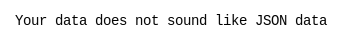

In [9]:
%%plantuml
@startjson
{'Order': {'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
   'petId': {'type': 'integer', 'format': 'int64', 'example': 198772},
   'quantity': {'type': 'integer', 'format': 'int32', 'example': 7},
   'shipDate': {'type': 'string', 'format': 'date-time'},
   'status': {'type': 'string',
    'description': 'Order Status',
    'example': 'approved',
    'enum': ['placed', 'approved', 'delivered']},
   'complete': {'type': 'boolean'}},
  'xml': {'name': 'order'}},
 'Customer': {'type': 'object',
  'properties': {'id': {'type': 'integer',
    'format': 'int64',
    'example': 100000},
   'username': {'type': 'string', 'example': 'fehguy'},
   'address': {'type': 'array',
    'xml': {'name': 'addresses', 'wrapped': True},
    'items': {'$ref': '#/components/schemas/Address'}}},
  'xml': {'name': 'customer'}},
 'Address': {'type': 'object',
  'properties': {'street': {'type': 'string', 'example': '437 Lytton'},
   'city': {'type': 'string', 'example': 'Palo Alto'},
   'state': {'type': 'string', 'example': 'CA'},
   'zip': {'type': 'string', 'example': '94301'}},
  'xml': {'name': 'address'}},
 'Category': {'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 1},
   'name': {'type': 'string', 'example': 'Dogs'}},
  'xml': {'name': 'category'}},
 'User': {'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
   'username': {'type': 'string', 'example': 'theUser'},
   'firstName': {'type': 'string', 'example': 'John'},
   'lastName': {'type': 'string', 'example': 'James'},
   'email': {'type': 'string', 'example': 'john@email.com'},
   'password': {'type': 'string', 'example': '12345'},
   'phone': {'type': 'string', 'example': '12345'},
   'userStatus': {'type': 'integer',
    'description': 'User Status',
    'format': 'int32',
    'example': 1}},
  'xml': {'name': 'user'}},
 'Tag': {'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64'},
   'name': {'type': 'string'}},
  'xml': {'name': 'tag'}},
 'Pet': {'required': ['name', 'photoUrls'],
  'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
   'name': {'type': 'string', 'example': 'doggie'},
   'category': {'$ref': '#/components/schemas/Category'},
   'photoUrls': {'type': 'array',
    'xml': {'wrapped': True},
    'items': {'type': 'string', 'xml': {'name': 'photoUrl'}}},
   'tags': {'type': 'array',
    'xml': {'wrapped': True},
    'items': {'$ref': '#/components/schemas/Tag'}},
   'status': {'type': 'string',
    'description': 'pet status in the store',
    'enum': ['available', 'pending', 'sold']}},
  'xml': {'name': 'pet'}},
 'ApiResponse': {'type': 'object',
  'properties': {'code': {'type': 'integer', 'format': 'int32'},
   'type': {'type': 'string'},
   'message': {'type': 'string'}},
  'xml': {'name': '##default'}}}
@endjson


In [2]:
import iplantuml

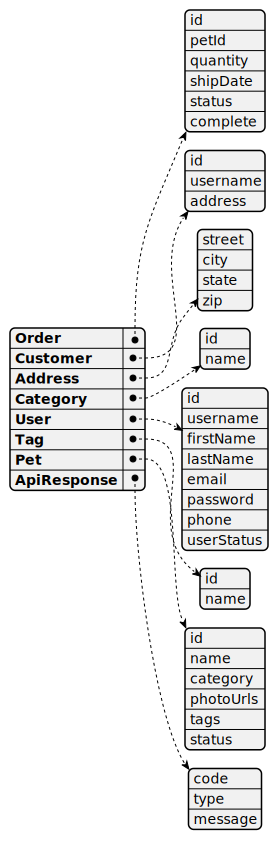

In [10]:
%%plantuml
@startjson
{
    "Order": [
        "id",
        "petId",
        "quantity",
        "shipDate",
        "status",
        "complete"
    ],
    "Customer": [
        "id",
        "username",
        "address"
    ],
    "Address": [
        "street",
        "city",
        "state",
        "zip"
    ],
    "Category": [
        "id",
        "name"
    ],
    "User": [
        "id",
        "username",
        "firstName",
        "lastName",
        "email",
        "password",
        "phone",
        "userStatus"
    ],
    "Tag": [
        "id",
        "name"
    ],
    "Pet": [
        "id",
        "name",
        "category",
        "photoUrls",
        "tags",
        "status"
    ],
    "ApiResponse": [
        "code",
        "type",
        "message"
    ]
}
@endjson

## JSON to Class Diagram

### Simple json

In [8]:
my_json =  {
    "Order": [
        "id",
        "petId",
        "quantity",
        "shipDate",
        "status",
        "complete"
    ]
}

In [17]:
#split in key value pairs
for key, value in my_json.items():
    my_key = key
    my_value = value
    print(key, '=', value)
    print(my_key)
    print(my_value)

Order = ['id', 'petId', 'quantity', 'shipDate', 'status', 'complete']
Order
['id', 'petId', 'quantity', 'shipDate', 'status', 'complete']


In [18]:
#create the plantuml text file
class_name = my_key #enter class name
textfile = open("plantuml.txt", "w")
textfile.write('@startuml\n')
textfile.write('class '+class_name + '{\n')
for element in my_value:
    textfile.write(element + "\n")
textfile.write('}\n')
textfile.write('@enduml')
textfile.close()   

In [29]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\plantuml.txt

### More complex json

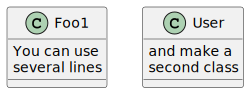

In [21]:
%%plantuml
@startuml
class Foo1 {
You can use
several lines
}
class User {
and make a
second class  
}
@enduml

In [1]:
my_json2 ={
    "Order": [
        "id",
        "petId",
        "quantity",
        "shipDate",
        "status",
        "complete"
    ],
    "Customer": [
        "id",
        "username",
        "address"
    ],
    "Address": [
        "street",
        "city",
        "state",
        "zip"
    ],
    "Category": [
        "id",
        "name"
    ],
    "User": [
        "id",
        "username",
        "firstName",
        "lastName",
        "email",
        "password",
        "phone",
        "userStatus"
    ],
    "Tag": [
        "id",
        "name"
    ],
    "Pet": [
        "id",
        "name",
        "category",
        "photoUrls",
        "tags",
        "status"
    ],
    "ApiResponse": [
        "code",
        "type",
        "message"
    ]
}

In [2]:
type(my_json2)

dict

In [60]:
textfile = open("plantuml_complex2.txt", "w")
textfile.write('@startuml\n')
for key, value in my_json2.items():
    textfile.write('class '+str(key) +'{\n')
    for i in range (len(value)):
        textfile.write(value[i] + "\n")
    textfile.write('}\n')
textfile.write('}\n')
textfile.write('@enduml')
textfile.close()  

In [64]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\plantuml_complex2.txt

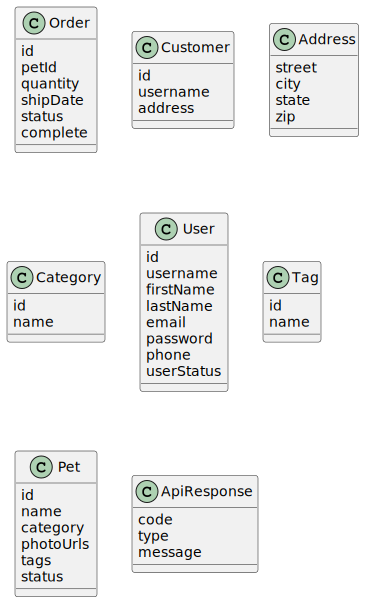

In [63]:
%%plantuml
@startuml
class Order{
id
petId
quantity
shipDate
status
complete
}
class Customer{
id
username
address
}
class Address{
street
city
state
zip
}
class Category{
id
name
}
class User{
id
username
firstName
lastName
email
password
phone
userStatus
}
class Tag{
id
name
}
class Pet{
id
name
category
photoUrls
tags
status
}
class ApiResponse{
code
type
message
}
@enduml